## AutoCorrelation

* Correlation with itself lagged by time units
* Less lags -> more correlation, more lags -> less correlation
* make stationary before calculation autocorrelation

In [1]:
# airline data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'data/airline.csv', index_col = 'Month')
df.plot()

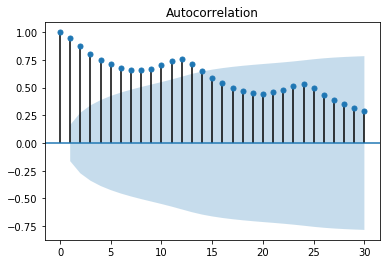

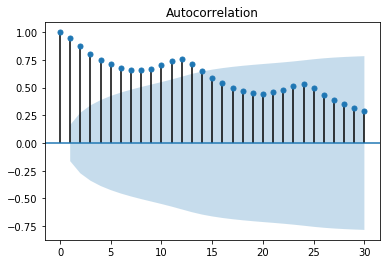

In [2]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(df, lags = 30)

# Observation : yearly seasonality visible at 12, 24

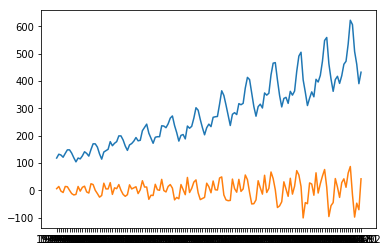

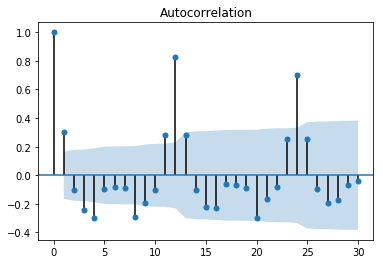

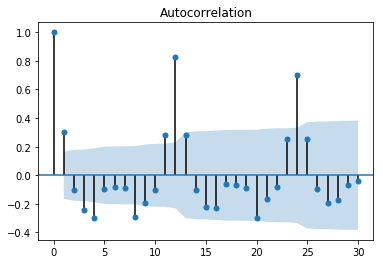

In [3]:
# First Order stationarity
df['Pass_Diff'] = df.diff(periods = 1)
df = df.dropna()

plt.plot(df['Passengers'])
plt.plot(df['Pass_Diff'])
plt.show()

plot_acf(df['Pass_Diff'], lags=30)

# Observations : 1st order difference did not make it stationary.
# Data might need seasonal stationary

## PACF

* Only direct effects are shown and intermediary effects are removed
* Ex : direct relationship btw now and 12 months ago

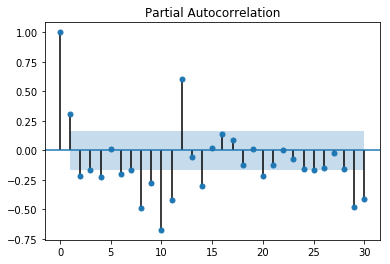

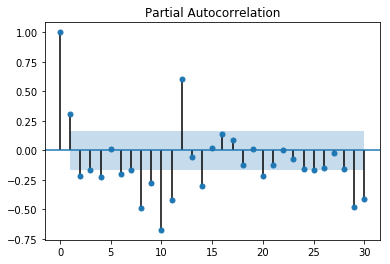

In [4]:
plot_pacf(df['Pass_Diff'], lags =30)

# Observation : Lag 12 is still significant and not 24!

## Using ACF and PACF

* If the ACF plot declines gradually and the PACF drops instantly, use Auto Regressive model.
* If the ACF plot drops instantly and the PACF declines gradually, use Moving Average model.
* If both ACF and PACF decline gradually, combine Auto Regressive and Moving Average models (ARMA).
* If both ACF and PACF drop instantly (no significant lags), it’s likely you won’t be able to model the time series.

## Summary

* ACF and PACF helps to analyze time series data (find parameters for modeling)
* Both ACF and PACF require stationary time series.
* But we’ll mostly rely on brute-force parameter finding methods for forecasting. It’s easier to do grid search than to look at charts.